# only 국민연금 가입 data

In [1]:
import pandas as pd
import numpy as np
import csv
import	koreanize_matplotlib
import matplotlib.pyplot as plt

## 국민연금 가입

In [69]:
f1 = "국민연금 가입 사업장 내역_202401.csv"
pensionDF = pd.read_csv(f1, encoding="cp949")

C:\Users\kdp\AppData\Local\Temp\ipykernel_19128\1038380759.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pensionDF = pd.read_csv(f1, encoding="cp949")


In [70]:
pensionDF.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,23-Dec,(주)니프코코리아,211814,1,31409,충청남도 아산시 둔포면,충청남도 아산시 둔포면 아산밸리남로,4420036032,4420036032,44,200,360,1,252901,포장용 플라스틱 성형용기 제조업,1988-01-01,586,301703340,1,0
1,23-Dec,신일기업(주),201810,1,4537,서울특별시 중구 충무로2가,서울특별시 중구 퇴계로,1114012500,1114055000,11,140,125,1,381002,NaN,1988-01-01,19,6727780,1,0
2,23-Dec,디에스디엘(주),104811,1,4526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,140,117,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,16,5194300,0,0
3,23-Dec,(주)헤럴드,104810,1,4336,서울특별시 용산구 후암동,서울특별시 용산구 후암로4길,1117010100,1117051000,11,170,101,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,322,130867200,6,8
4,23-Dec,연합뉴스(주),102812,1,3143,서울특별시 종로구 수송동,서울특별시 종로구 율곡로2길,1111012400,1111061500,11,110,124,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,825,410437380,3,10


In [71]:
pensionDF.columns

Index(['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

사용할 데이터 col을 뽑아보자

In [72]:
pensionDF['사업장지번상세주소'] = np.where(pensionDF['사업장지번상세주소'].str.strip() != '', pensionDF['사업장지번상세주소'], pensionDF['사업장도로명상세주소'])

In [74]:
pensionDF = pensionDF[["사업장명", "사업장지번상세주소", "가입자수", "당월고지금액"]]

In [75]:
# pensionDF[" 사업장지번상세주소"].unique()
pensionDF.columns

Index(['사업장명', '사업장지번상세주소', '가입자수', '당월고지금액'], dtype='object')

In [76]:
pensionDF.columns = ["사업장명", "본사주소", "가입자수", "당월고지금액"]
pensionDF.columns

Index(['사업장명', '본사주소', '가입자수', '당월고지금액'], dtype='object')

In [77]:
# pensionDF.drop(pensionDF["본사주소"] == " ")

### 주소분리

In [78]:
pensionDF.sort_values("당월고지금액")

,사업장명,본사주소,가입자수,당월고지금액
432762,영양군청 상생 국민지원금 지급사업,경상북도 영양군 영양읍,0,0
253477,주식회사민트아이엔씨,서울특별시 영등포구 여의도동,0,0
513727,대운건설주식회사/일용/감천초등학교 병설유치원 개축공사,경상북도 김천시 감천면,0,0
458297,주식회사럭키종합건설/일용/쌍동리 59-26번지 신축공사,경기도 광주시 초월읍,0,0
513723,（주）포테이토소프트,서울특별시 은평구 대조동,0,0
...,...,...,...,...
150647,엘지디스플레이(주),서울특별시 영등포구 여의도동,27978,14141978700
134977,에스케이하이닉스 주식회사,경기도 이천시 부발읍,31145,16237739840
13145,엘지전자(주),서울특별시 영등포구 여의도동,35609,18101199080
3244,현대자동차(주),서울특별시 서초구 양재동,68427,34364239440


In [79]:
addr = pd.DataFrame(pensionDF["본사주소"])
addr = addr["본사주소"].apply(lambda x : x.split()[:2])
addr =	pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,충청남도,아산시
1,서울특별시,중구
2,서울특별시,중구
3,서울특별시,용산구
4,서울특별시,종로구


In [80]:
pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
pensionDF.head()

C:\Users\kdp\AppData\Local\Temp\ipykernel_19128\995769337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_19128\995769337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_19128\995769337.py:1: SettingWithCopyWarning: 
A value is trying to be set o

,사업장명,본사주소,가입자수,당월고지금액,시도,군구,나머지 주소
0,(주)니프코코리아,충청남도 아산시 둔포면,586,301703340,충청남도,아산시,둔포면
1,신일기업(주),서울특별시 중구 충무로2가,19,6727780,서울특별시,중구,충무로2가
2,디에스디엘(주),서울특별시 중구 남대문로4가,16,5194300,서울특별시,중구,남대문로4가
3,(주)헤럴드,서울특별시 용산구 후암동,322,130867200,서울특별시,용산구,후암동
4,연합뉴스(주),서울특별시 종로구 수송동,825,410437380,서울특별시,종로구,수송동


In [81]:
pensionDF = pensionDF.drop("본사주소", axis = True)

In [82]:
pensionDF["시도"].unique()

array(['충청남도', '서울특별시', '경기도', '인천광역시', '충청북도', '강원특별자치도', '부산광역시',
       '전라남도', '울산광역시', '전북특별자치도', '경상북도', '세종특별자치시', '대구광역시', '경상남도',
       '제주특별자치도', '대전광역시', '광주광역시', '', '전라북도'], dtype=object)

In [83]:
# pensionDF[pensionDF["시도"]==""]
pensionDF = pensionDF[pensionDF["시도"] != ""]

In [84]:
addr_aliases =	{'전라북도':'전북특별자치도'}

In [85]:
pensionDF['시도'] = pensionDF['시도'].apply(lambda	v: addr_aliases.get(v, v))

## <hr>Group Area 

In [102]:
group_area = pensionDF.groupby(["시도", "군구"]).sum(numeric_only=True)
group_area.head()

가입자수      당월고지금액
시도      군구                    
강원특별자치도 강릉시  25815  7280077520
        고성군   4676  1275902920
        동해시   8613  2509806520
        삼척시  10241  3401386280
        속초시   6886  1828572880

In [103]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [104]:
group_area = group_area.sort_values("div", ascending=False)

In [105]:
group_area

가입자수        당월고지금액            div
시도      군구                                      
경기도     수원시  273273  112869835400  413029.590922
        이천시   74784   30140568560  403034.988233
인천광역시   동구    15074    5966909580  395841.155632
울산광역시   동구    35107   13710043340  390521.643547
전라남도    나주시   71798   28014418300  390183.825455
...             ...           ...            ...
전북특별자치도 장수군    2363     587584560  248660.414727
경상북도    청송군    2504     620776580  247913.969649
강원특별자치도 양구군    2169     520992200  240199.262333
경상북도    영양군    1730     412220380  238277.676301
세종특별자치시 연동면       0             0            NaN

[232 rows x 3 columns]

In [124]:

# group_area = group_area.drop("황해북도")
# group_area
# company

['삼성전자(주)',
 '에스케이하이닉스 주식회사',
 '에이치디현대인프라코어(주)',
 '에이치디현대중공업주식회사',
 '한국전력공사',
 '현대제철주식회사당진공장',
 '주식회사포스코',
 '엘지전자(주)',
 '현대트랜시스주식회사',
 '농협은행주식회사',
 '주식회사 케이티',
 '현대엔지니어링(주)',
 '현대자동차(주)',
 '(주)신보(일용)신세종복합 발전소 건설공사 중 전기공사2',
 '한국수력원자력(주)',
 '(주)부산은행',
 '한국수자원공사',
 '한국항공우주산업(주)본점',
 '에이치엠엠(주)',
 '주식회사 포스코지와이알테크',
 '한국서부발전(주)',
 '(주)강원랜드',
 '삼성중공업(주)거제조선소',
 '삼성바이오로직스(주)',
 '한화솔루션(주) 여수',
 '삼성디스플레이(주)',
 '주한미군사령부서울충당',
 '한국도로공사',
 '대한항공(주)',
 '삼성엔지니어링(주)',
 '롯데정밀화학(주)',
 '현대모비스(주)',
 '기아(주)AutoLand광명',
 '에스케이실트론주식회사',
 '모트라스주식회사',
 '기아(주)AutoLand화성',
 '한국철도공사',
 '근로복지공단',
 '국방과학연구소',
 '고려아연(주)온산제련소',
 '두산에너빌리티(주)',
 '한국지엠주식회사',
 '오뚜기(주)',
 '한화솔루션(주)진천사업장',
 '(주)삼표시멘트',
 '르노코리아자동차 주식회사',
 '대구텍 유한책임회사',
 '(주)엘지유플러스',
 '한국가스안전공사',
 '한국가스공사',
 '대덕전자주식회사',
 '국민건강보험공단',
 '한국토지주택공사',
 '한화에어로스페이스보은사업장',
 '유니투스주식회사',
 '(사)부산항만산업협회-화물고정업',
 '인천공항시설관리 주식회사',
 '쿠팡풀필먼트서비스 유한회사',
 '한국중부발전(주)',
 '한국마사회',
 '덕양산업(주)',
 '코카콜라음료(주)',
 '롯데케미칼주식회사-(의왕)',
 '기아(주) AutoLand광주',
 '(주)한국특강',
 '에쓰-오일(주)',
 '서울교통공사'

In [122]:
col_list = group_area.index.to_list()
company = []
x = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[(pensionDF["시도"]==col[0])&(pensionDF["군구"]==col[1])].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = pensionDF[(pensionDF["시도"]==col[0])&(pensionDF["군구"]==col[1])].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    company += sr.to_list()
    x.append(f"{col[0]} {col[1]}")

    if "광역시" not in col[0] and "특별시" not in col[0] and "경기도" not in col[0]:
        color.append("red")
    else:
        color.append("gray")
    # company.append(sr.to_list()[0])
    # print(f"company = {company}")

'''
col_list = group_area.index.to_list()
company = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    if "광역시" in col:
        color.append("red")
    else:
        color.append("gray")
    company += sr.to_list()
    print(f"company = {company}")
'''


================('경기도', '수원시')================
4286          삼성전자(주)
134644        삼성전기(주)
90368     삼성전자서비스주식회사
Name: 사업장명, dtype: object
================('경기도', '이천시')================
134977           에스케이하이닉스 주식회사
135298              주식회사 케이알산업
3401      비테스코테크놀로지스코리아 유한책임회사
Name: 사업장명, dtype: object
================('인천광역시', '동구')================
88488    에이치디현대인프라코어(주)
88491          현대제철주식회사
60034        현대제철주식회사본사
Name: 사업장명, dtype: object
================('울산광역시', '동구')================
357220    에이치디현대중공업주식회사
144729        (주)현대미포조선
47889     에이치디현대이엔티 (주)
Name: 사업장명, dtype: object
================('전라남도', '나주시')================
3214            한국전력공사
3142      한전케이피에스 주식회사
136648         한국농어촌공사
Name: 사업장명, dtype: object
================('충청남도', '당진시')================
44043     현대제철주식회사당진공장
429248      현대아이티씨주식회사
144348        한국내화주식회사
Name: 사업장명, dtype: object
================('경상북도', '포항시')================
455092      주식회사포스코
143678    (주)포스코이앤씨
143670    (주)포스코퓨처엠
Name: 사업장

'\ncol_list = group_area.index.to_list()\ncompany = []\ncolor = []\nfor col in col_list:\n    print(f"================{col}================")\n    print(pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])\n    sr = pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]\n    if "광역시" in col:\n        color.append("red")\n    else:\n        color.append("gray")\n    company += sr.to_list()\n    print(f"company = {company}")\n'

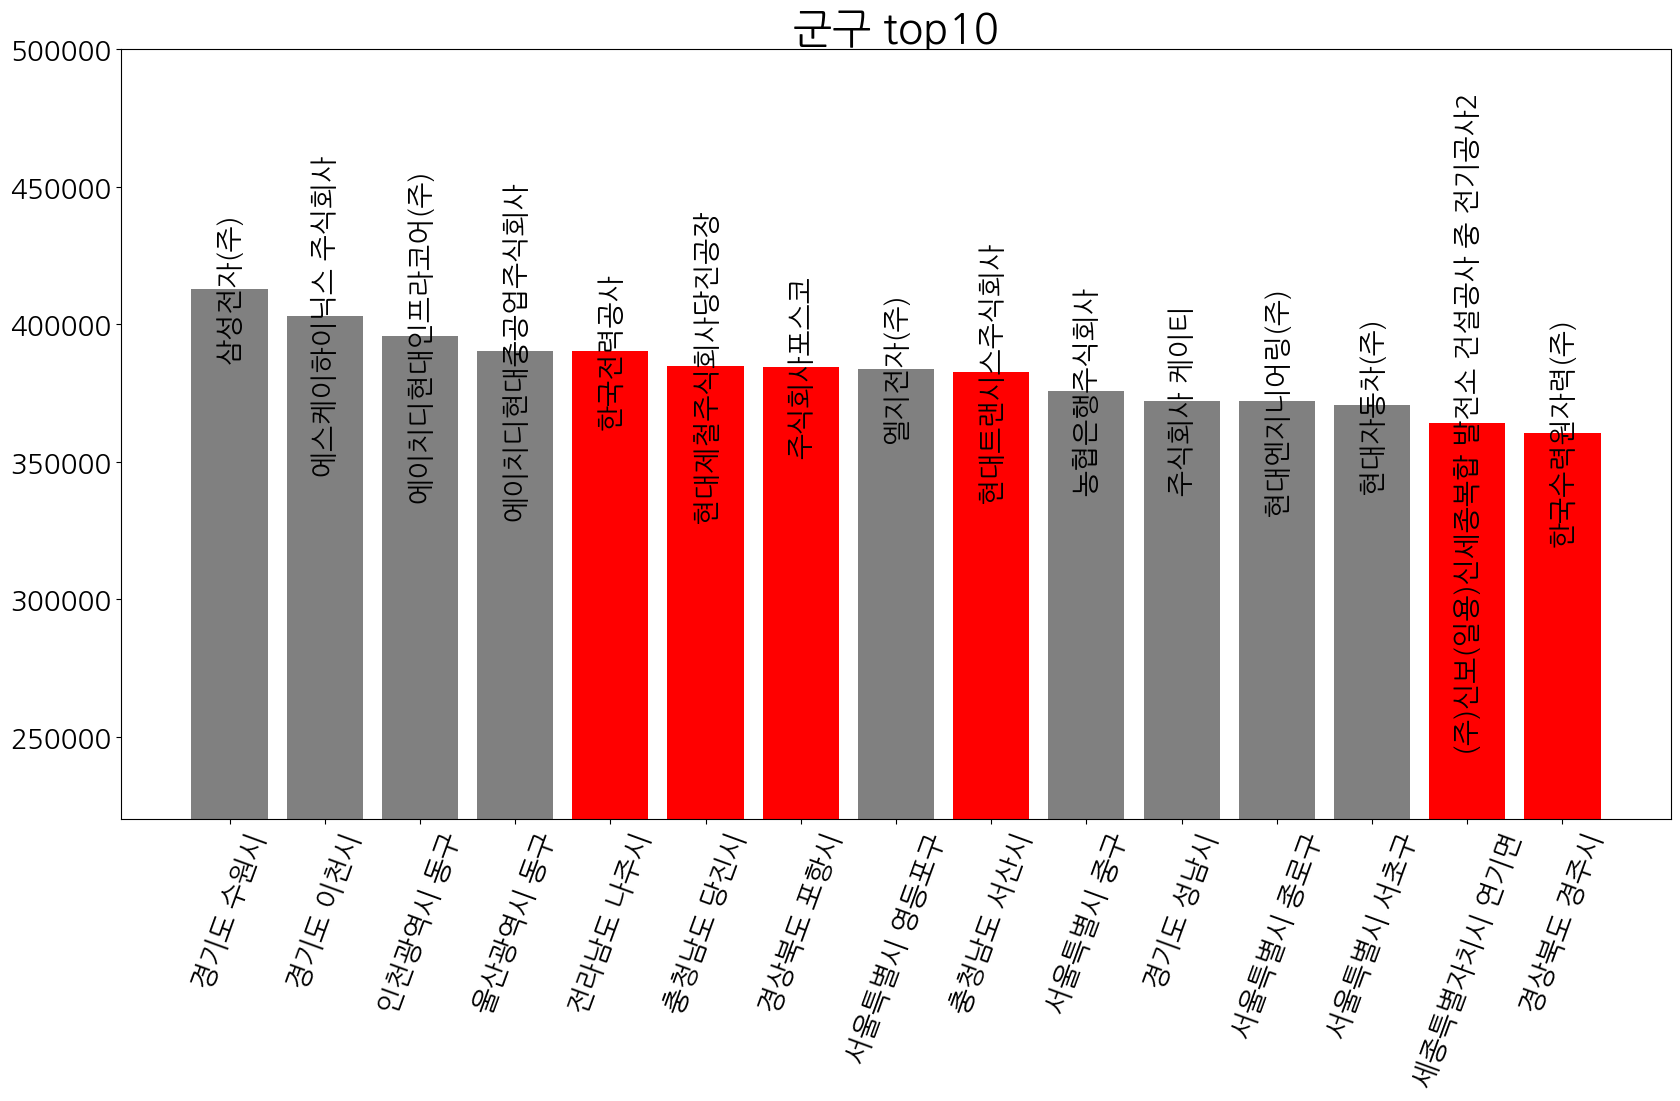

In [127]:
plt.figure(figsize=(20, 10))
# x = group_area.index.to_list()
x = x[:15]
y = group_area["div"].to_list()[:15]
bar = plt.bar(x, y, color = color)
plt.xticks(rotation=70)
plt.ylim(220000, 500000)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

idx = 0
plt.title("군구 top10", fontsize=30)
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='center', size = 20, rotation=90)
    idx += 1

# <hr>지방만 보기

In [157]:
group_area = pensionDF[(pensionDF["시도"] != "서울특별시") & (pensionDF["시도"] != "경기도")]
group_area.head()

,사업장명,가입자수,당월고지금액,시도,군구,나머지 주소
0,(주)니프코코리아,586,301703340,충청남도,아산시,둔포면
30,삼풍전기(주),13,3344540,인천광역시,남동구,고잔동
47,(합)부원전기,19,6370320,충청남도,공주시,유구읍
65,KB오토시스(주),172,67227320,충청남도,아산시,음봉면
70,에이제이주식회사,89,31594540,충청남도,아산시,영인면


In [158]:
group_area = group_area.groupby(["시도", "군구"]).sum(numeric_only=True)
group_area.head()

가입자수      당월고지금액
시도      군구                    
강원특별자치도 강릉시  25815  7280077520
        고성군   4676  1275902920
        동해시   8613  2509806520
        삼척시  10241  3401386280
        속초시   6886  1828572880

In [159]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [160]:
group_area = group_area.sort_values("div", ascending=False)
group_area

,,가입자수,당월고지금액,div
시도,군구,,,
인천광역시,동구,15074,5966909580,395841.155632
울산광역시,동구,35107,13710043340,390521.643547
전라남도,나주시,71798,28014418300,390183.825455
충청남도,당진시,44271,17045659040,385029.907614
경상북도,포항시,102497,39402009560,384421.100715
...,...,...,...,...
전북특별자치도,장수군,2363,587584560,248660.414727
경상북도,청송군,2504,620776580,247913.969649
강원특별자치도,양구군,2169,520992200,240199.262333


In [161]:
col_list = group_area.index.to_list()
company = []
x = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[(pensionDF["시도"]==col[0])&(pensionDF["군구"]==col[1])].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = pensionDF[(pensionDF["시도"]==col[0])&(pensionDF["군구"]==col[1])].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    company += sr.to_list()
    x.append(f"{col[0]} {col[1]}")

    #if "광역시" not in col[0] and "특별시" not in col[0] and "경기도" not in col[0]:
        #color.append("red")
    #else:
        #color.append("gray")
    # company.append(sr.to_list()[0])
    # print(f"company = {company}")

'''
col_list = group_area.index.to_list()
company = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    if "광역시" in col:
        color.append("red")
    else:
        color.append("gray")
    company += sr.to_list()
    print(f"company = {company}")
'''


================('인천광역시', '동구')================
88488    에이치디현대인프라코어(주)
88491          현대제철주식회사
60034        현대제철주식회사본사
Name: 사업장명, dtype: object
================('울산광역시', '동구')================
357220    에이치디현대중공업주식회사
144729        (주)현대미포조선
47889     에이치디현대이엔티 (주)
Name: 사업장명, dtype: object
================('전라남도', '나주시')================
3214            한국전력공사
3142      한전케이피에스 주식회사
136648         한국농어촌공사
Name: 사업장명, dtype: object
================('충청남도', '당진시')================
44043     현대제철주식회사당진공장
429248      현대아이티씨주식회사
144348        한국내화주식회사
Name: 사업장명, dtype: object
================('경상북도', '포항시')================
455092      주식회사포스코
143678    (주)포스코이앤씨
143670    (주)포스코퓨처엠
Name: 사업장명, dtype: object
================('충청남도', '서산시')================
96084      현대트랜시스주식회사
30385     한화토탈에너지스(주)
498953      트라닉스 주식회사
Name: 사업장명, dtype: object
================('세종특별자치시', '연기면')================
463549       (주)신보(일용)신세종복합 발전소 건설공사 중 전기공사2
447579    삼원전기건설(주)(일용)신세종복합 발전소 건설공사[전기공사1]
454609 

'\ncol_list = group_area.index.to_list()\ncompany = []\ncolor = []\nfor col in col_list:\n    print(f"================{col}================")\n    print(pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])\n    sr = pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]\n    if "광역시" in col:\n        color.append("red")\n    else:\n        color.append("gray")\n    company += sr.to_list()\n    print(f"company = {company}")\n'

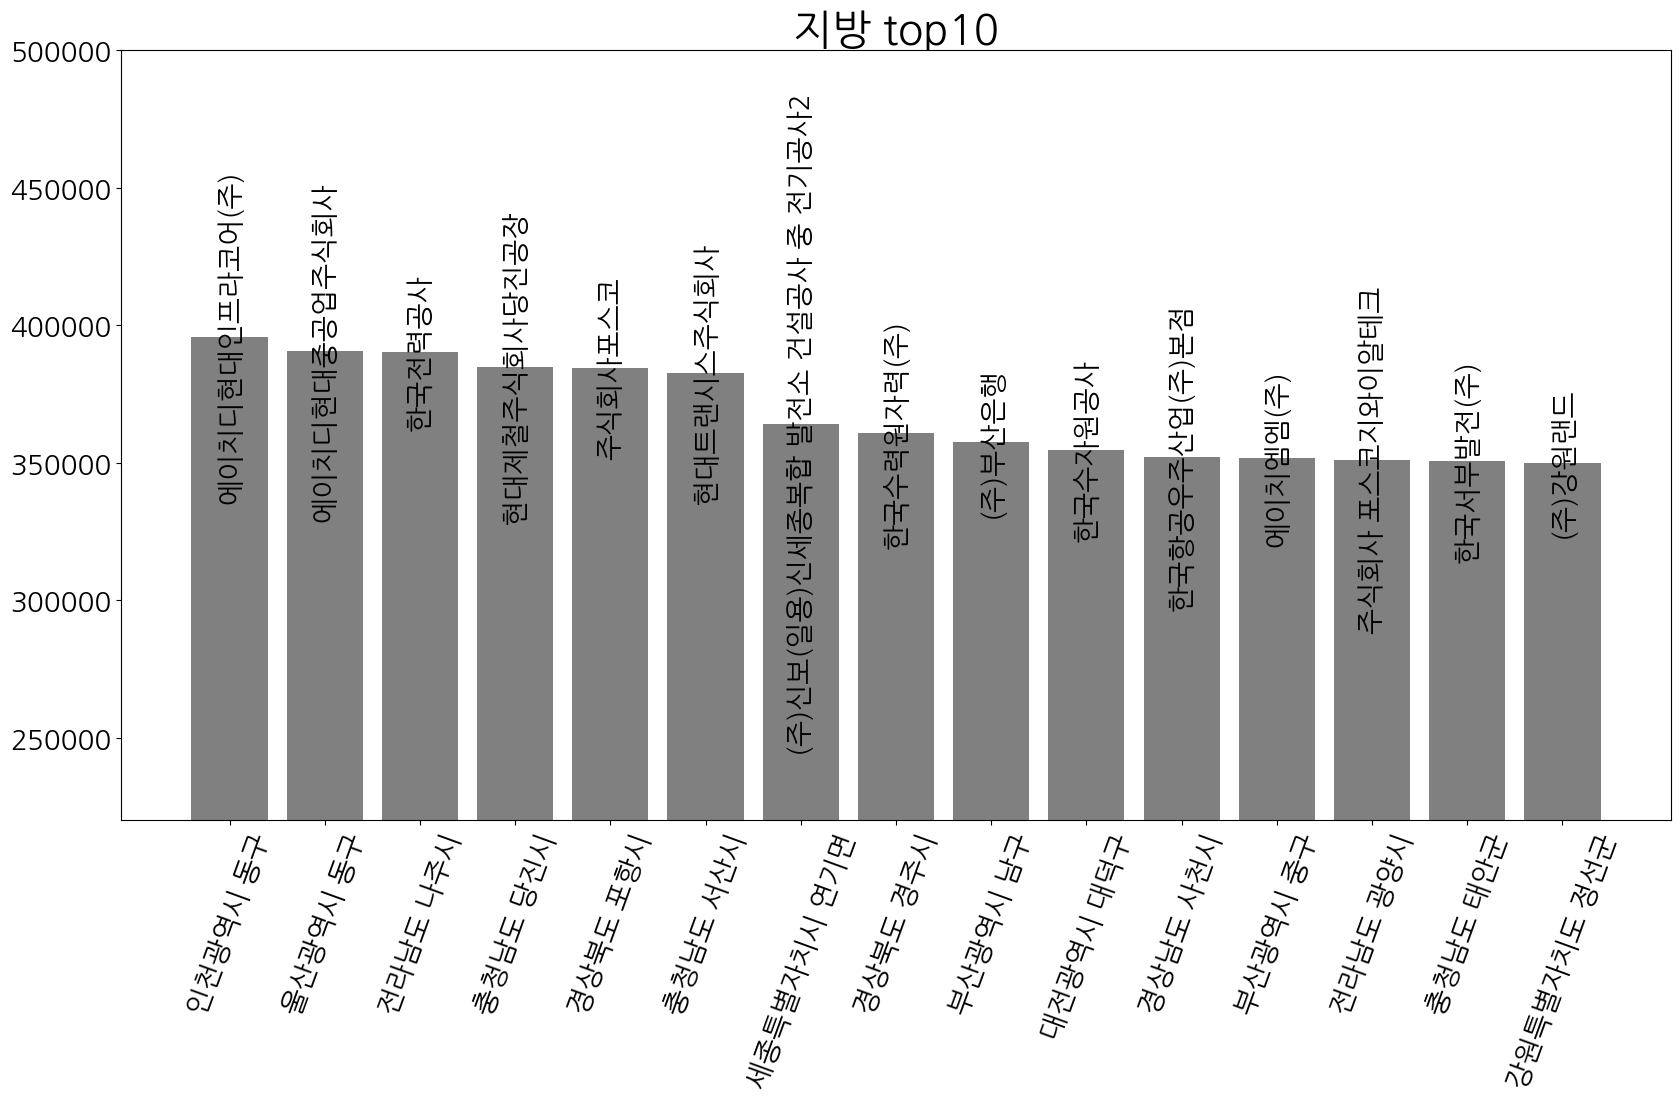

In [164]:
plt.figure(figsize=(20, 10))
# x = group_area.index.to_list()
x = x[:15]
y = group_area["div"].to_list()[:15]
bar = plt.bar(x, y, color = "gray")
plt.xticks(rotation=70)
plt.ylim(220000, 500000)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

idx = 0
plt.title("지방 top10", fontsize=30)
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='center', size = 20, rotation=90)
    idx += 1

## <hr> 하위분류

In [96]:
group_area = group_area.sort_values("div", ascending=True)
group_area

,,가입자수,당월고지금액,div
시도,군구,,,
경상북도,영양군,1730,412220380,238277.676301
강원특별자치도,양구군,2169,520992200,240199.262333
경상북도,청송군,2504,620776580,247913.969649
전북특별자치도,장수군,2363,587584560,248660.414727
전라남도,목포시,18955,4721667900,249098.807702
...,...,...,...,...
울산광역시,동구,35107,13710043340,390521.643547
인천광역시,동구,15074,5966909580,395841.155632
경기도,이천시,74784,30140568560,403034.988233


In [97]:
# 하위 10개
col_list = group_area.index.to_list()
company = []
x = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[(pensionDF["시도"]==col[0])&(pensionDF["군구"]==col[1])].sort_values("당월고지금액", ascending=True).head(3)["사업장명"])
    sr = pensionDF[(pensionDF["시도"]==col[0])&(pensionDF["군구"]==col[1])].sort_values("당월고지금액", ascending=True).head(1)["사업장명"]
    company.append(
      pensionDF[(pensionDF["시도"]==col[0])&(pensionDF["군구"]==col[1])].sort_values("당월고지금액", ascending=True)["사업장명"].nunique()
    )
    # company += sr.to_list()
    x.append(f"{col[0]} {col[1]}")
print(f"company = {company}")

================('경상북도', '영양군')================
427927                                   영양군청(의료급여관리사)
440684                          영양군청-일용/영양군 군민지원금 지원사업
433651    주식회사일주건설/일용/영양제2풍력발전 발전단지 건설공사 중 내부도로 및 기초공사
Name: 사업장명, dtype: object
================('강원특별자치도', '양구군')================
470329    (주)미래건설/상용/2022년임도사업(기번11/구조개량-월명2)
497981                            양구군청/가로수관리인
496809                        양구군청/녹지유지관리인_꽃섬
Name: 사업장명, dtype: object
================('경상북도', '청송군')================
327705    청송군청 종합민원과(차량등록업무보조)
278627       농업회사법인주식회사바른푸드시스템
367259    주식회사세일-상용/좌지소하천 정비공사
Name: 사업장명, dtype: object
================('전북특별자치도', '장수군')================
508011                       장수군청 산림공원과(물빛공원관리단)
531768    주식회사한양콘텍-(일용)관급자재 구입(장수초 폴리우레아수지도박방수제)
503698               장수군농업기술센터(과수지도팀국가관리병해충예찰요원)
Name: 사업장명, dtype: object
================('전라남도', '목포시')================
484655                            주식회사삼이
532095    (주)플러버/상용/목포 종합경기장 건립공사 중 트랙공사
499519                   

In [98]:
# pensionDF[(pensionDF["시도"]=="전북특별자치도")&(pensionDF["군구"]=="장수군")].sort_values("당월고지금액", ascending=True)["사업장명"].unique()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


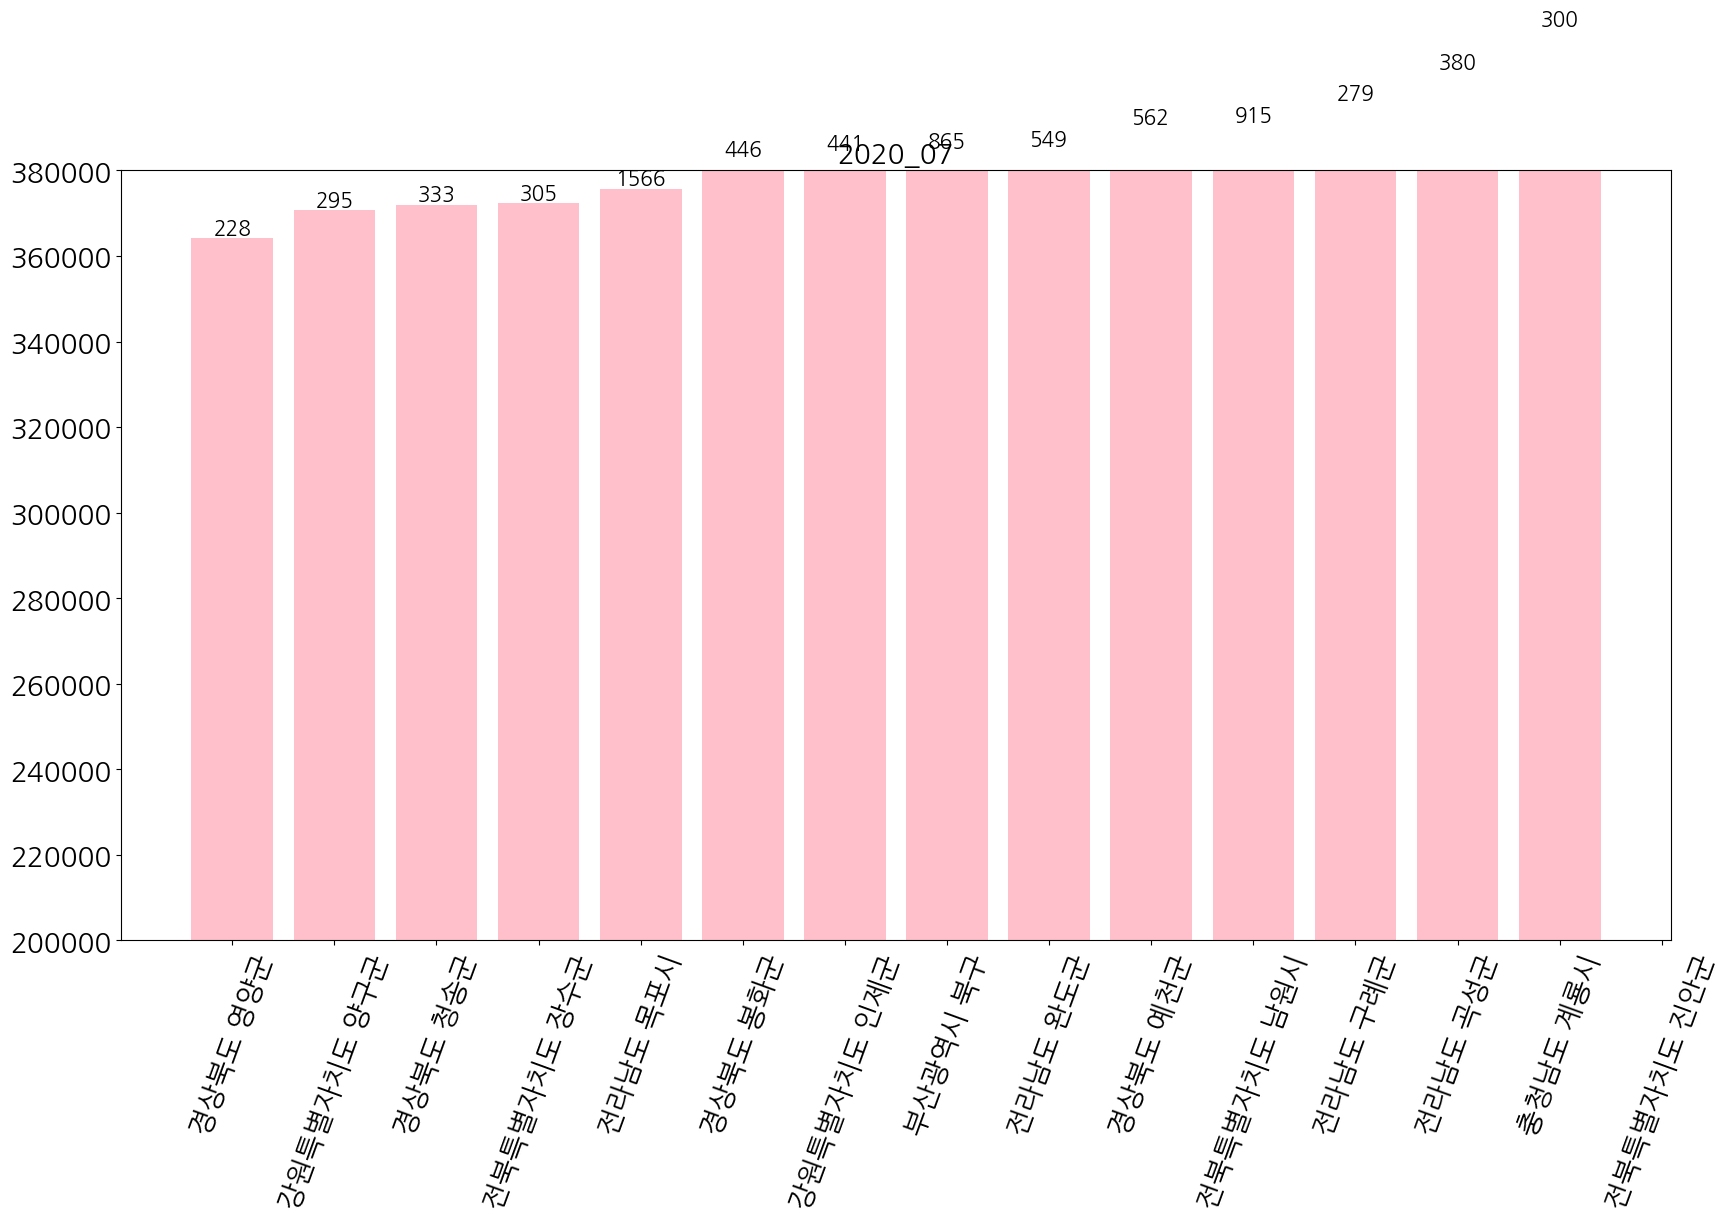

In [99]:
plt.figure(figsize=(20, 10))
# x = group_area.index.to_list()
x = x[:15]
y = group_area["div"].to_list()[-15:]
bar = plt.bar(x, y, color = 'pink')
plt.xticks(rotation=70)
plt.ylim(200000, 380000)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
#company = ["에이치디현대중공업주식회사", "현대자동차(주)", "삼성전자(주)", "주식회사포스코", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "주식회사 카카오"]
idx = 0
plt.title("2020_07", fontsize=20)
# 숫자 넣는 부분

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=0)
    idx += 1


In [100]:
company

[228,
 295,
 333,
 305,
 1566,
 446,
 441,
 865,
 549,
 562,
 915,
 279,
 380,
 300,
 383,
 379,
 1704,
 588,
 333,
 427,
 355,
 1077,
 1818,
 288,
 634,
 355,
 472,
 437,
 462,
 413,
 460,
 651,
 365,
 948,
 875,
 736,
 497,
 591,
 403,
 595,
 396,
 943,
 507,
 1507,
 952,
 1497,
 2969,
 378,
 446,
 1247,
 409,
 890,
 1137,
 289,
 1580,
 533,
 977,
 2524,
 407,
 498,
 1546,
 1688,
 1260,
 447,
 738,
 565,
 1053,
 1109,
 545,
 2145,
 1711,
 542,
 1822,
 1374,
 3145,
 2152,
 659,
 1731,
 3705,
 583,
 478,
 1471,
 2072,
 388,
 916,
 637,
 1209,
 1499,
 6282,
 2601,
 2845,
 1985,
 1919,
 2603,
 1125,
 815,
 5569,
 704,
 2488,
 1134,
 1031,
 812,
 597,
 615,
 2973,
 2460,
 485,
 392,
 6318,
 5177,
 364,
 8716,
 861,
 630,
 489,
 1059,
 903,
 615,
 3234,
 867,
 2367,
 722,
 1646,
 1771,
 5867,
 6950,
 599,
 4721,
 1,
 2321,
 4332,
 5841,
 1363,
 768,
 220,
 1861,
 117,
 1842,
 4147,
 321,
 2449,
 5621,
 8583,
 951,
 2663,
 1717,
 1205,
 2362,
 6424,
 2080,
 641,
 790,
 1505,
 3535,
 1337,
 